E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers.

Not sure where to begin? Scroll to the bottom to find challenges!

Citation: Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

Don't know where to start?
Challenges are brief tasks designed to help you practice specific skills:

🗺️ Explore: Negative order quantities indicate returns. Which products have been returned the most?
📊 Visualize: Create a plot visualizing the profits earned from UK customers weekly, monthly, and quarterly.
🔎 Analyze: Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?
Scenarios are broader questions to help you develop an end-to-end project for your portfolio:

You are working for an online retailer. Currently, the retailer sells over 4000 unique products. To take inventory of the items, your manager has asked you whether you can group the products into a small number of categories. The categories should be similar in terms of price and quantity sold and any other characteristics you can extract from the data.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

In [7]:
SELECT * FROM 'variable_explanation.csv'

,Variable,Explanation
0,InvoiceNo,A 6-digit integral number uniquely assigned to...
1,StockCode,A 5-digit integral number uniquely assigned to...
2,Description,Product (item) name
3,Quantity,The quantities of each product (item) per tran...
4,InvoiceDate,The day and time when each transaction was gen...
5,UnitPrice,Product price per unit in sterling (pound)
6,CustomerID,A 5-digit integral number uniquely assigned to...
7,Country,The name of the country where each customer re...


In [2]:
SELECT * FROM 'online_retail.csv'
LIMIT 100


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,12/1/10 9:37,2.55,14688,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,12/1/10 9:37,0.42,14688,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,12/1/10 9:37,0.55,14688,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,12/1/10 9:37,0.55,14688,United Kingdom


In [4]:
SELECT
    StockCode,
    SUM(Quantity) AS TotalReturns
FROM
    online_retail.csv  -- Replace with your actual table name
WHERE
    Quantity < 0
GROUP BY
    StockCode
ORDER BY
    TotalReturns DESC;

,StockCode,TotalReturns
0,22757,-1.0
1,84600,-1.0
2,84843,-1.0
3,22560,-1.0
4,22764,-1.0
...,...,...
2554,23003,-9058.0
2555,84347,-9376.0
2556,23005,-19201.0
2557,23166,-74494.0


In [9]:
SELECT
    COUNT(*) AS TotalRows, 
    SUM(CASE WHEN online_retail.Country IS NULL THEN 1 ELSE 0 END) AS NullValuesCol1,
     -- Repeat for each column
FROM
    'online_retail.csv';

,TotalRows,NullValuesCol1
0,541909,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    100 non-null    object 
 1   StockCode    100 non-null    object 
 2   Description  100 non-null    object 
 3   Quantity     100 non-null    int64  
 4   InvoiceDate  100 non-null    object 
 5   UnitPrice    100 non-null    float64
 6   CustomerID   100 non-null    int64  
 7   Country      100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [11]:
df.describe

<bound method NDFrame.describe of    InvoiceNo StockCode  ... CustomerID         Country
0     536365    85123A  ...      17850  United Kingdom
1     536365     71053  ...      17850  United Kingdom
2     536365    84406B  ...      17850  United Kingdom
3     536365    84029G  ...      17850  United Kingdom
4     536365    84029E  ...      17850  United Kingdom
..       ...       ...  ...        ...             ...
95    536378     22352  ...      14688  United Kingdom
96    536378     21212  ...      14688  United Kingdom
97    536378     21975  ...      14688  United Kingdom
98    536378     21977  ...      14688  United Kingdom
99    536378     84991  ...      14688  United Kingdom

[100 rows x 8 columns]>

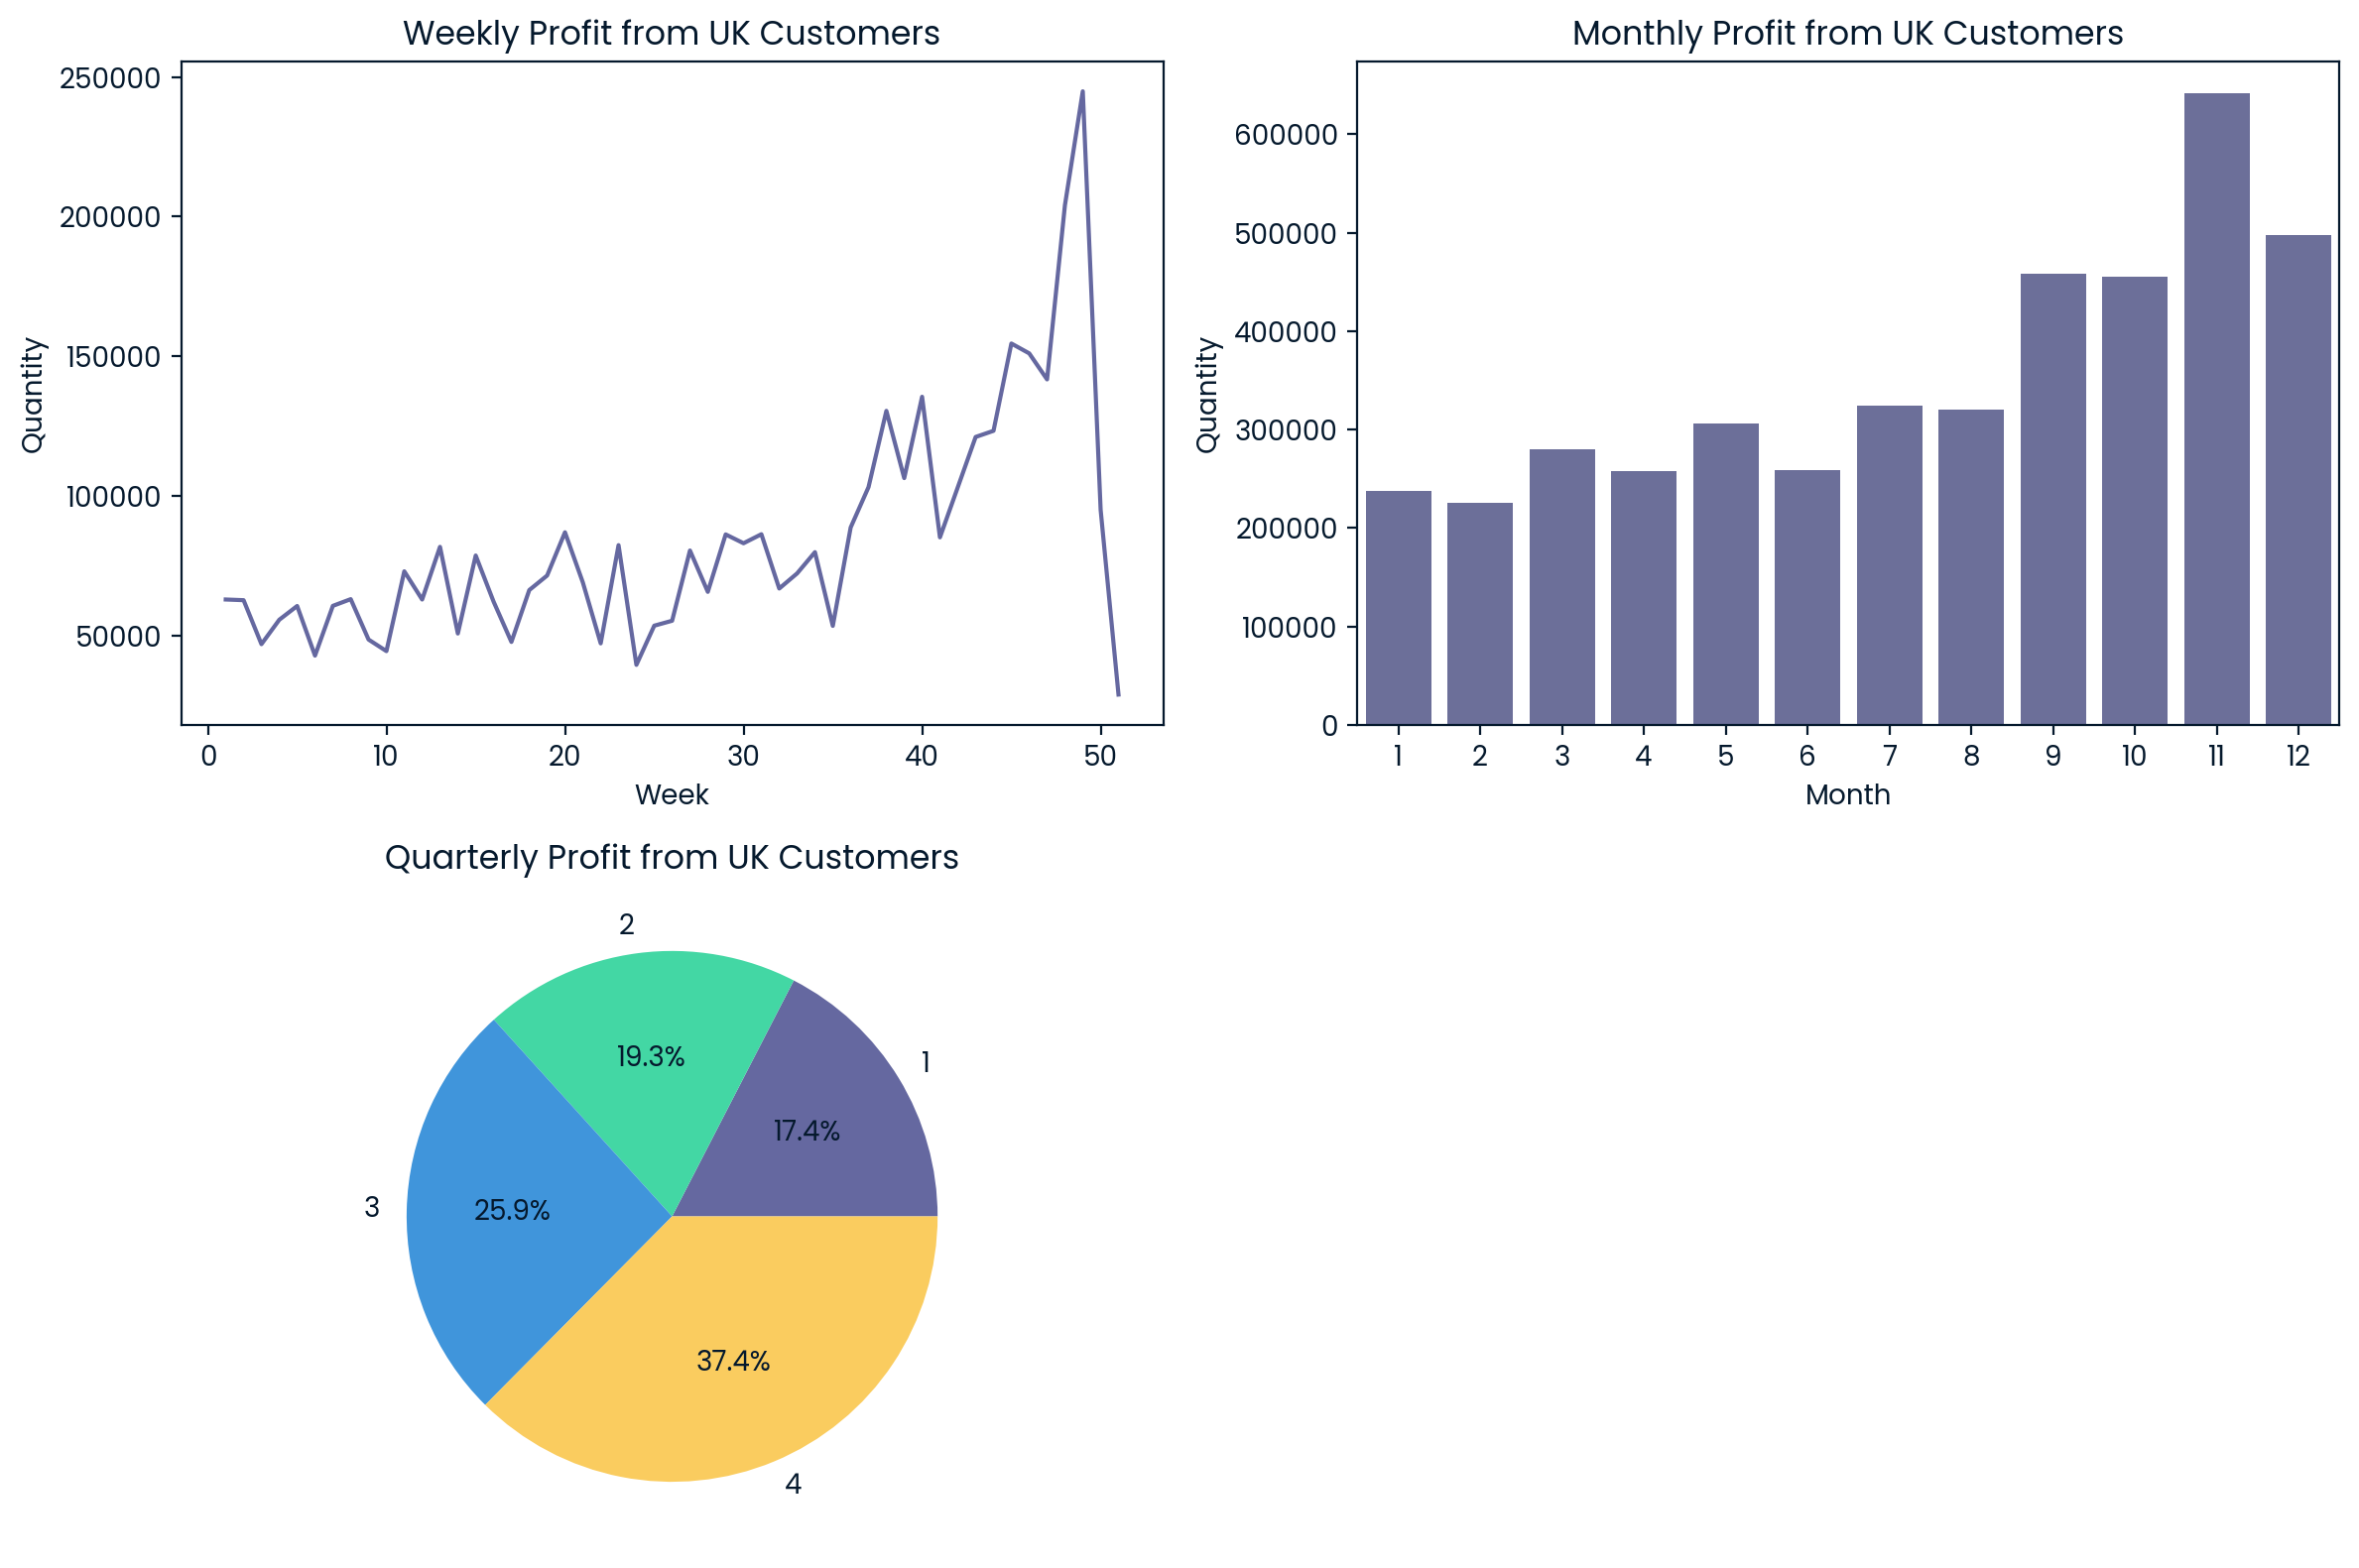

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('online_retail.csv')

# Filter for UK customers
uk_df = df[df['Country'] == 'United Kingdom']

# Convert 'OrderDate' to datetime format
uk_df['InvoiceDate'] = pd.to_datetime(uk_df['InvoiceDate'])

# Create new columns for week, month, and quarter
uk_df['Week'] = uk_df['InvoiceDate'].dt.isocalendar().week
uk_df['Month'] = uk_df['InvoiceDate'].dt.month
uk_df['Quarter'] = uk_df['InvoiceDate'].dt.quarter

# Calculate weekly, monthly, and quarterly profits
weekly_profit = uk_df.groupby('Week')['Quantity'].sum()
monthly_profit = uk_df.groupby('Month')['Quantity'].sum()
quarterly_profit = uk_df.groupby('Quarter')['Quantity'].sum()

# Plot the profits
plt.figure(figsize=(12, 8))

# Weekly Profit
plt.subplot(2, 2, 1)
plt.plot(weekly_profit.index, weekly_profit.values)
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.title('Weekly Profit from UK Customers')

# Monthly Profit
plt.subplot(2, 2, 2)
sns.barplot(x=monthly_profit.index, y=monthly_profit.values)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Monthly Profit from UK Customers')

# Quarterly Profit
plt.subplot(2, 2, 3)
plt.pie(quarterly_profit.values, labels=quarterly_profit.index, autopct='%1.1f%%')
plt.title('Quarterly Profit from UK Customers')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Monthly Profit from UK Customers')

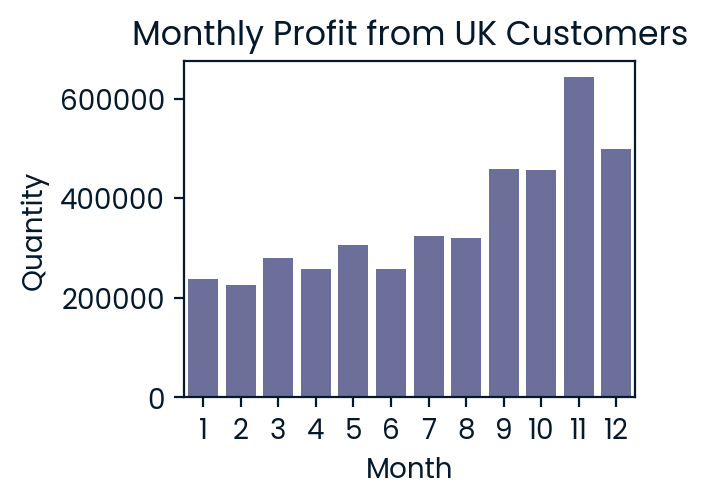

In [22]:
# Monthly Profit
plt.subplot(2, 2, 2)
sns.barplot(x=monthly_profit.index, y=monthly_profit.values)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Monthly Profit from UK Customers')


Text(0.5, 1.0, 'Quarterly Profit from UK Customers')

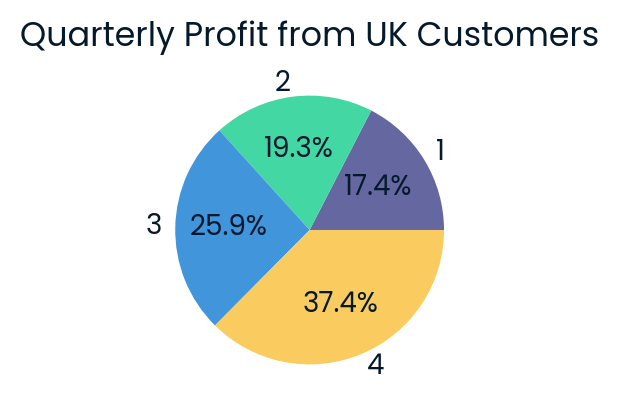

In [23]:
# Quarterly Profit
plt.subplot(2, 2, 3)
plt.pie(quarterly_profit.values, labels=quarterly_profit.index, autopct='%1.1f%%')
plt.title('Quarterly Profit from UK Customers')


In [2]:
WITH UK_Orders AS (
    SELECT AVG(Quantity) AS Avg_UK_OrderSize
    FROM 'online_retail.csv'
    WHERE Country = 'United Kingdom'
),
Non_UK_Orders AS (
    SELECT AVG(Quantity) AS Avg_Non_UK_OrderSize
    FROM 'online_retail.csv'
    WHERE Country != 'United Kingdom'
)
SELECT
    UK_Orders.Avg_UK_OrderSize,
    Non_UK_Orders.Avg_Non_UK_OrderSize
FROM
    UK_Orders, Non_UK_Orders;

,Avg_UK_OrderSize,Avg_Non_UK_OrderSize
0,8.605486,19.655424
